# Challenges for week 4

Now that we've seen how to visualise data in Pandas, it's time for you to apply this knowledge. This week has three challenges. Make sure to give it a try and complete all of them. 

**Some important notes for the challenges:**
1. These challenges are a warming up, and help you get ready for class. Make sure to give them a try. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next challenge (but make sure to hand it in).
2. While we of course like when you get all the answers right, the important thing is to exercise and apply the knowledge. So we will still accept challenges that may not be complete, as long as we see enough effort *for each challenge*. This means that if one of the challenges is not delivered (not started and no attempt shown), we unfortunately will not be able to provide a full grade for that week.
3. Delivering the challenge on time on Canvas assignment is critical, as it helps also prepare for the DA live session. Check on Canvas how to hand it in.

### Facing issues? 

We are constantly monitoring the issues on the GitHub general repository (https://github.com/uva-cw-digitalanalytics/2021s2/issues) to help you out. Don't hesitate to log an issue there, explaining well what the problem is, showing the code you are using, and the error message you may be receiving. 

**Important:** We are only monitoring the repository in weekdays, from 9.30 to 17.00. Issues logged after this time will most likely be answered the next day. This means you should now wait for our response before submitting a challenge :-)

## Getting setup for the challenges

We will use actual Twitter data for the challenges of this week. To do so, you need:
* To download DMI-TCAT data that you may already be collecting for yourself, or from a colleague (if you haven't requested data collection yet). Please use **the same data** that you requested sentiment analysis for
* The sentiment analysis results (get them from SurfDrive)
* The **retweets** file also available on SurfDrive

If you don't have sentiment analysis results, get them from a colleague (in SurfDrive), but then make sure to download also their Twitter data from DMI-TCAT - otherwise the merge won't work.

The challenges require you to already have two binary variables for the Twitter data based on the ```text``` column (created for DA3). They should be two **meaningful** categories for your data, and they should have either the value 0 (when the tweet is not of that category) or 1 (when the tweet is of that category). 

*You can therefore reuse the code you created for the DA3 challenges, and just continue from there. If you don't have not completed DA3, create them in this assignment*.

**All the challenges below are with this Twitter data. Make sure to start your challenge by doing the basics of loadinhg and inspecting the data, even if not specified in challenge itself.**



***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tweet = pd.read_csv("tcat_NuriaVila-20210207-20210208------------fullExport--9654fe3ff4.csv")
sentiment = pd.read_csv("NuriaVila_EN_completed.csv")
retweet = pd.read_csv("NuriaVila_retweets.csv")

***

## Challenge 1

Create one dataset that merges the information from the retweets file (that contains how many retweets each tweet that was retweeted received), the sentiment analysis, and the Twitter dataset from DMI-TCAT.

*Justify how you have done the merging (in MarkDown), especially for the retweet column. This includes handling missing values, if appropriate.*

***

In order to merge the three files, I check each dataframe first.

In [2]:
tweet.dtypes

id                               int64
time                             int64
created_at                      object
from_user_name                  object
text                            object
filter_level                    object
possibly_sensitive             float64
withheld_copyright             float64
withheld_scope                 float64
truncated                      float64
retweet_count                    int64
favorite_count                   int64
lang                            object
to_user_name                    object
in_reply_to_status_id          float64
quoted_status_id               float64
source                          object
location                        object
lat                            float64
lng                            float64
from_user_id                     int64
from_user_realname              object
from_user_verified               int64
from_user_description           object
from_user_url                   object
from_user_profile_image_u

In [3]:
sentiment.dtypes

Unnamed: 0     int64
id             int64
text          object
negative       int64
positive       int64
neutral        int64
dtype: object

In [4]:
retweet.dtypes

Unnamed: 0        int64
retweet_id        int64
retweets_total    int64
dtype: object

In [5]:
len(tweet), len(sentiment), len(retweet)

(5121, 4002, 7706)

The row number of these files are not the same, because:
* when requiring the sentiment analysis, I just chose the English tweets in the **tweet** dataframe, so **sentiment** is shorter than **tweet**
* the unit of analysis of **retweet** is the post, not the user.  

First, I filter the English tweets, and merge **tweet** and **sentiment**, as their units of analysis are the same.

In [6]:
# filter English tweets
tweet = tweet[tweet['lang'] == 'en']
len(tweet)

4002

In [7]:
# merge tweet and sentiment
twitter = tweet.merge(sentiment, on = ['id', 'text'])

In [8]:
twitter.dtypes

id                               int64
time                             int64
created_at                      object
from_user_name                  object
text                            object
filter_level                    object
possibly_sensitive             float64
withheld_copyright             float64
withheld_scope                 float64
truncated                      float64
retweet_count                    int64
favorite_count                   int64
lang                            object
to_user_name                    object
in_reply_to_status_id          float64
quoted_status_id               float64
source                          object
location                        object
lat                            float64
lng                            float64
from_user_id                     int64
from_user_realname              object
from_user_verified               int64
from_user_description           object
from_user_url                   object
from_user_profile_image_u

In [9]:
len(twitter)

4002

The length of **twitter** is the same with that of **tweet** and **sentiment**. Then I merge **retweet** with them.    

In [10]:
# check the minimum of retweet number
retweet['retweets_total'].describe()

count    7706.000000
mean        4.009603
std        13.154033
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       437.000000
Name: retweets_total, dtype: float64

From the result above I see that there are 4002 tweets have the result of sentiment analysis, while 7706 tweets have the retweet number (and it just collect the retweet number for tweets that have **at least one repost**).

In [11]:
# check the condition of the posts in tweet and the posts in retweet
user = tweet[['id']].merge(retweet[['retweet_id']], how = 'outer', left_on = 'id', right_on = 'retweet_id')
user

,id,retweet_id
0,1.358446e+18,1.358446e+18
1,1.358446e+18,NaN
2,1.358446e+18,NaN
3,1.358446e+18,NaN
4,1.358446e+18,NaN
...,...,...
11392,NaN,9.681663e+17
11393,NaN,9.767193e+17
11394,NaN,9.815243e+17
11395,NaN,9.841255e+17


From the table above, I find that the possible reasons for 7706 retweets may include:  
* one user may send more than one post in this Twitter dataset
* there were new posts be retweeted after **tweet** was collected  
In the later exercise, I want to study the relationship between (perhaps) sentiment and retweets, so I want to keep all the information in **tweet**, and left-join **retweet**. Also, after the merge, I need to change the missing values to 0 in the ```retweets_total``` column, as the missing value indicates that this post has no retweet.

In [12]:
# merge retweet
twitter = twitter.merge(retweet, how = 'left', left_on = 'id', right_on = 'retweet_id')

# change the missing values to 0
twitter[['retweets_total']] = twitter[['retweets_total']].fillna(0)

# delete 'retweet_id'
twitter = twitter.drop(labels = 'retweet_id', axis = 1)

# drop unrelated columns
twitter = twitter.drop(labels = ['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

The three tables are merged.

***

## Challenge 2

Propose and visualise the answer for a RQ that has the **number of retweets** or **sentiment** as the dependent variable, and one of the categories you created as the independent variable. Justify your choices in the answer.

In this answer, you need to:
* Show descriptive statistics for the IV and the DV
* Create one univariate visualisation for the IV
* Create one univariate visualisation for the DV
* Create one bivariate visualisation with the IV and DV in the same chart
* Show the descriptives of the DV grouped by the IV
* Provide a brief summary (in MarkDown) with your interpretation of the results

***

My **RQ** is: *To what extent does the presence of external link in the Twitter dataset of ebook relates to their number of retweets?*  
I assume that tweets with external links would have higher number of retweets on general, because they would be more informative than the tweets that do not contain external links, and thus can attract more reposts.
* The **IV** in this RQ is, as I created last week, the tweets that with or without external links.
* The **DV** in this RQ is the number of retweets.
* The **unit of analysus** is the Twitter posts in this dataset.

### IV: Presence of external link

Similar with last week, I create a varaible that can tell me whether the tweet contains "http" or not (so whether they have external links in the text or not).

In [13]:
# search for the twitter texts that contain "http". 
twitter['ext_link'] = twitter['text'].str.contains('http').astype(int)

# get descriptive statistics for external links
twitter['ext_link'].value_counts()

1    2849
0    1153
Name: ext_link, dtype: int64

Before start doing other things, I choose only the columns that I will use in this exercise for protecting the privacy of the information in **twitter**.

In [14]:
# select the related variables
twitter = twitter[['id', 'retweets_total', 'ext_link']]

<AxesSubplot:xlabel='ext_link', ylabel='count'>

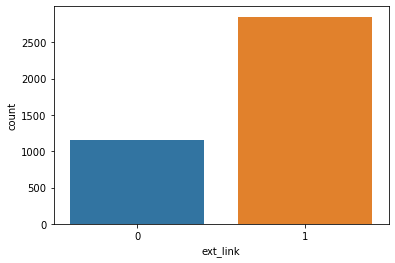

In [15]:
# visualize IV
sns.countplot(x = 'ext_link', data = twitter)

In this Twitter dataset, there are more posts contain external links (2849 of which contain external links, and 1153 of which do not contain external links). The number of posts with external links are more than two times than that of posts without links.

### DV: Number of retweets

In [16]:
# get descriptive statistics for number of retweets
twitter['retweets_total'].value_counts()

0.0      3691
1.0       145
2.0        59
3.0        37
4.0        15
5.0        11
6.0         7
8.0         7
12.0        4
7.0         3
9.0         3
18.0        2
15.0        2
11.0        2
13.0        2
10.0        2
40.0        1
23.0        1
25.0        1
16.0        1
135.0       1
53.0        1
29.0        1
49.0        1
34.0        1
20.0        1
Name: retweets_total, dtype: int64

I want to use countplot to visualize retweet number. As there are many categories in this variable, I put ```retweets_total``` on y-axis.

<AxesSubplot:xlabel='count', ylabel='retweets_total'>

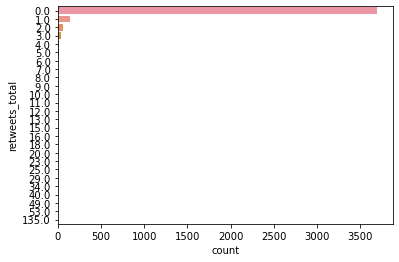

In [17]:
# visualize DV
sns.countplot(y = twitter['retweets_total'])

The majority of the tweets in this dataset have no reposts. The largest number of retweet falls on one post that has 135 retweets.

### Bivariate visualisation with IV and DV

In [18]:
# get descriptive statistics for DV group by IV
twitter.groupby('ext_link').agg({'retweets_total' : 'mean'})

,retweets_total
ext_link,
0,0.189939
1,0.358722


<AxesSubplot:xlabel='ext_link', ylabel='retweets_total'>

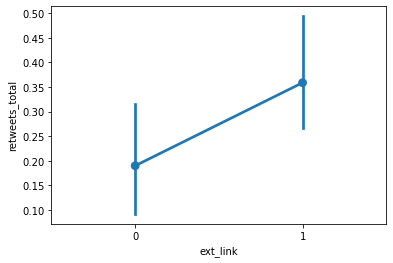

In [19]:
# visualize IV and DV
sns.pointplot(x = 'ext_link',
              y = 'retweets_total',
              data = twitter)

From the descriptive statistics and the plot I find that: 
* Posts with external links has, on general, slightly higher number of retweets than posts without external links. 
* The mean retweet number for posts without external links is 0.19, and that for posts with external links is 0.36. 
* The confidence intervals of these two category show that the difference of retweet number between posts with and without external links is not statistically significant.

***

## Challenge 3 (Ethical AI)

We now take a look at the German credit dataset again (in the Ethical AI notebook). Can you think of another feature (apart from age) that might lead to potential discrimination? 

In this answer, you need to:

* Identify one feature (apart from age) that can be problematic in the German credit dataset. Justify your choice in MarkDown.
* Create a visualization to show whether the outcome is imbalanced between privileged and underprivileged group.
* Calculate the disparate impact metric.

***

In [20]:
credit = pd.read_csv('german_credit_data.csv')
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Foreign worker,Credit repaid
0,67,male,2,own,NaN,little,1169,6,radio/TV,yes,yes
1,22,female,2,own,little,moderate,5951,48,radio/TV,yes,no
2,49,male,1,own,little,NaN,2096,12,education,yes,yes
3,45,male,2,free,little,little,7882,42,furniture/equipment,yes,yes
4,53,male,2,free,little,little,4870,24,car,yes,no
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,yes,yes
996,40,male,3,own,little,little,3857,30,car,yes,yes
997,38,male,2,own,little,NaN,804,12,radio/TV,yes,yes
998,23,male,2,free,little,little,1845,45,radio/TV,yes,no


For the German credit dataset, the condition of each applicant's **checking account** may influence their condition of repaid credit, because the money that each applicant can take from at any time would, to some extend, reflects their financial situation.  
I first check the categories of ```Checking account```, then decide the underprivileged group.

In [21]:
# check the categories in "Checking account"
credit['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In this exercise, I define applicants with ```little``` money in their checking accounts as an underprivileged group.

In [22]:
# recategorize "Checking account" to privileged group and underprivileged group
def apply_checking(checking):
    if checking == 'little':
        return 1
    else:
        return 0

credit['checking'] = credit['Checking account'].apply(apply_checking)

In [23]:
# recategorize credit repaid condition
def apply_credit(credit):
    if credit == "yes":
        return 1
    else:
        return 0

credit['credit'] = credit['Credit repaid'].apply(apply_credit)

<AxesSubplot:xlabel='checking', ylabel='credit'>

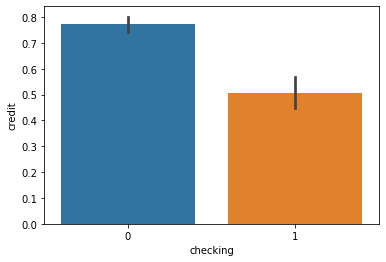

In [24]:
# visualize the credit repaid condition of the privileged and underprivileged group
sns.barplot(x = 'checking', y = 'credit', data = credit)

In [25]:
# get the mean for the groups
credit.groupby('checking').mean()['credit']

checking
0    0.772727
1    0.507299
Name: credit, dtype: float64

From the plot and the mean I discover that the applicants in the underprivileged group (```checking``` = 1) are less likely to repay the credit than the applicants in the privileged group.

In [26]:
# calculate disparate impact metric
underprivileged = credit[credit['checking'] == 1]['credit'].mean()
privileged = credit[credit['checking'] == 0]['credit'].mean()
disparate_impact = underprivileged / privileged
disparate_impact

0.65650493774152

The result of the metric shows that there is a higher benefit for the privileged group. Therefore, this dataframe can lead to potential discriminations against **the applicants who have little money in their checking account**.

***

**Finally**, imbalanced datasets are potentially problematic not only because of ethical concerns. Other aspects of imbalance can be of concern too.

For example, dataset with imbalanced outcome can impact the performance when building prediction models. Say we want to predict which tweet is popular (defined as tweets with number of retweets > 100). If we want to build a prediction model based on a dataset with only 0.1% tweets as popular, you may not be able to find a good way to separate popular and unpopular tweets, simply because there are not enough examples to generalize.

Do you observe any imbalance in your Twitter dataset? You only need to describe in MarkDown.

***

I discover that for the Twitter dataset I use in this exercise, the posts that are sent by unvarified accounts and that sent by varified accounts are very imbalanced.

In [27]:
tweet['from_user_verified'].value_counts()

0    3921
1      81
Name: from_user_verified, dtype: int64

If I want to study the relationship between the posts sent by verified/unverified accounts and the retweet number, there are not enough data for me to do so, because in this Twitter dataset, there are only about 2% posts were sent by verified accounts.